# Financial Equation

**Machine Learning techniques to predict revenue based on the quantity sold and unit price using a linear regression mode**
                                                        
By Rushikesh Sonwane

### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Import Dataset

In [2]:
data = pd.read_csv('C:\\Users\\hplap\\Feynn_Lab\\Project_3\\OnlineRetail.csv', encoding='latin-1')

### Understand Dataset

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
data.shape

(541909, 8)

### Add a New Column (Revenue)
Such that **Revenue = Quantity * Unit Price**

In [8]:
# Revenue = Quantity * UnitPrice
data['Revenue'] = ''
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [9]:
# Print Data
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France,16.60


### Training and Testing Model

In [10]:
# Select the relevant variables for the model
df = data[['Quantity', 'UnitPrice', 'Revenue']]

In [11]:
# Split the data into training and testing sets
X = df[['Quantity', 'UnitPrice']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Evaluate the model
Mean Squared Error & R2_Score

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

##### Print the model's performance metrics


In [15]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 50446.15794674941


In [16]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8463479278316363


# Data Visualization

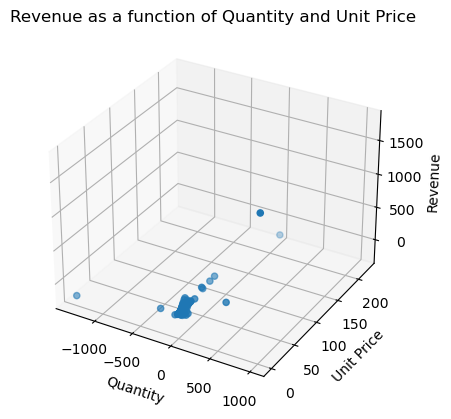

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample a subset of data for visualization
sample_size = 1000
sample_data = df.sample(n=sample_size, random_state=42)

# Extract quantity, unit price, and revenue from the sample data
quantity = sample_data['Quantity']
unit_price = sample_data['UnitPrice']
revenue = sample_data['Quantity'] * sample_data['UnitPrice']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(quantity, unit_price, revenue)

# Set labels and title
ax.set_xlabel('Quantity')
ax.set_ylabel('Unit Price')
ax.set_zlabel('Revenue')
plt.title('Revenue as a function of Quantity and Unit Price')

# Show the plot
plt.show()


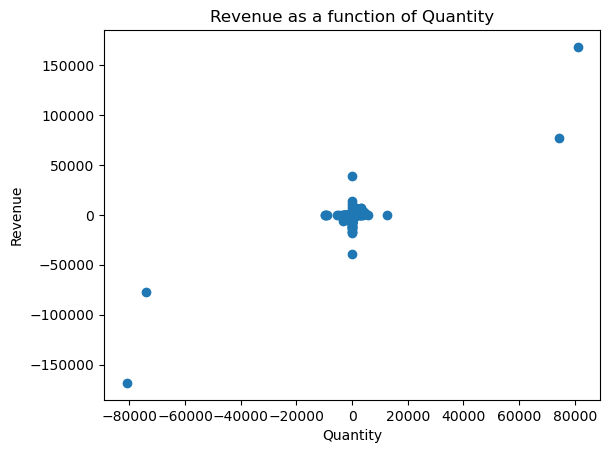

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['Quantity'], df['Revenue'])

# Set labels and title
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Revenue as a function of Quantity')

# Show the plot
plt.show()


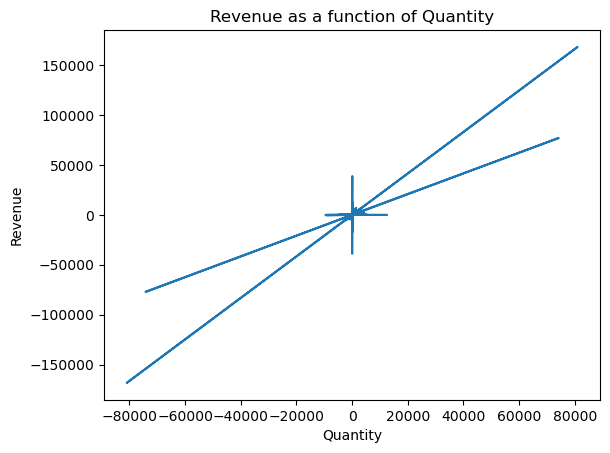

In [19]:
import matplotlib.pyplot as plt

# Extract the Quantity and Unit_Price variables from the dataset
quantity = df['Quantity']
unit_price = df['UnitPrice']

# Calculate the revenue
revenue = quantity * unit_price

# Create a line graph
plt.plot(quantity, revenue)

# Set labels and title
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Revenue as a function of Quantity')

# Show the plot
plt.show()
